In [1]:
%load_ext autoreload
%load_ext autotime
%autoreload 2

# Online Outcomes: Predicting Success in Virtual Learning

**<font size="4">Author: Jeffrey Hanif Watson</font>**

## Imports and Project Path

In [2]:
# importing standard packages
import os
import sys

# setting project path
gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

# importing 3rd party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

# importing local imports
from src import class_Database as d
from src import class_Cleaner as c
from src import helper_functions as f
from src import visualizations as v

# setting notebook styling
%matplotlib inline
sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette('GnBu_r')
pd.options.display.max_rows = 300

time: 1.87 s


## Creating The Database

In [3]:
# creating database & database class instance
database_name = 'outcomes.db'
db = d.Database(database_name)

time: 1.1 ms


**Run the cell below once to populate the database. After the database is populated, the cell can be commented out**

In [4]:
# file_name = 'anonymisedData.zip'
# db.populate(file_name, database_name)

time: 469 µs


## Exploring the Demographic Data

In [5]:
# instantiating cleaner object
cl = c.Cleaner(database_name)

time: 1.06 ms


In [6]:
# creating the database
student_info = cl.student_info_full()

time: 218 ms


In [7]:
# checking the info
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   target                32593 non-null  int64 
 1   row_id                32593 non-null  object
 2   code_module           32593 non-null  object
 3   code_presentation     32593 non-null  object
 4   id_student            32593 non-null  object
 5   gender                32593 non-null  object
 6   region                32593 non-null  object
 7   highest_education     32593 non-null  object
 8   imd_band              31482 non-null  object
 9   age_band              32593 non-null  object
 10  num_of_prev_attempts  32593 non-null  int64 
 11  studied_credits       32593 non-null  int64 
 12  disability            32593 non-null  object
 13  final_result          32593 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.5+ MB
time: 24.7 ms


In [8]:
# cleaning the data
student_info = cl.cleaner_studentinfo(student_info,[])

time: 74 ms


In [9]:
# rechecking the info
student_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31144 entries, 1 to 32592
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                31144 non-null  int64   
 1   row_id                31144 non-null  object  
 2   code_module           31144 non-null  object  
 3   code_presentation     31144 non-null  object  
 4   id_student            31144 non-null  object  
 5   gender                31144 non-null  object  
 6   region                31144 non-null  object  
 7   highest_education     31144 non-null  object  
 8   imd_band              31144 non-null  object  
 9   age_band              31144 non-null  object  
 10  num_of_prev_attempts  31144 non-null  int64   
 11  studied_credits       31144 non-null  int64   
 12  disability            31144 non-null  object  
 13  final_result          31144 non-null  object  
 14  course_load           31144 non-null  category
dtypes:

## Checking the Rate of Each Binary Outcome

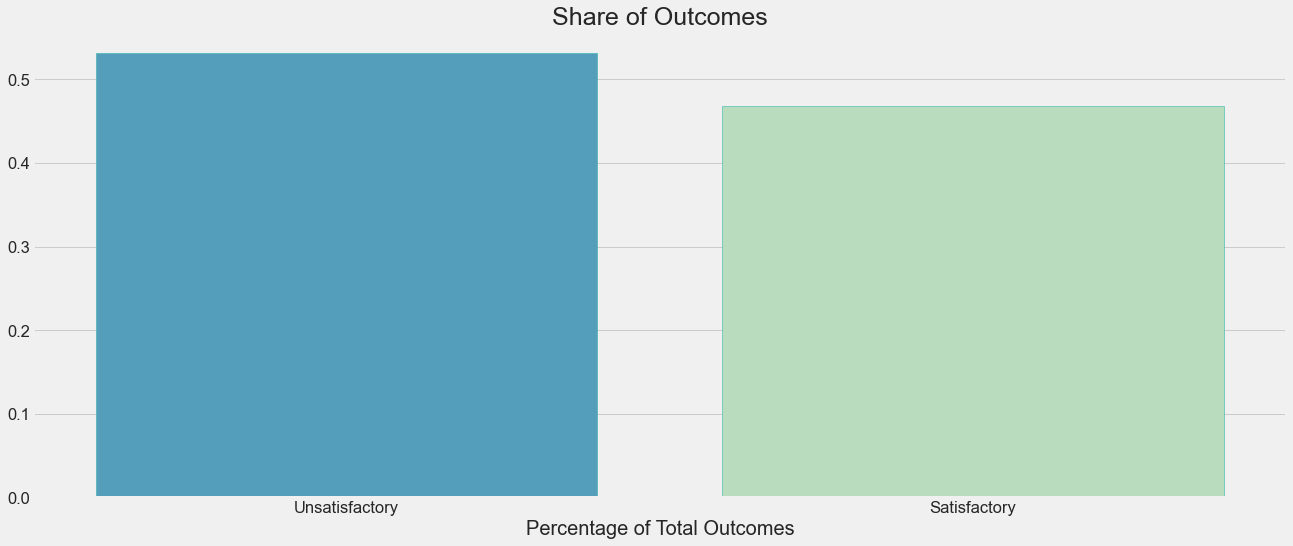

,Outcome,Percentage
0,Unsatisfactory,0.531724
1,Satisfactory,0.468276


time: 120 ms


In [10]:
v.outcomes_target(student_info)

## Checking the Rate of Each Multiclass Outcome

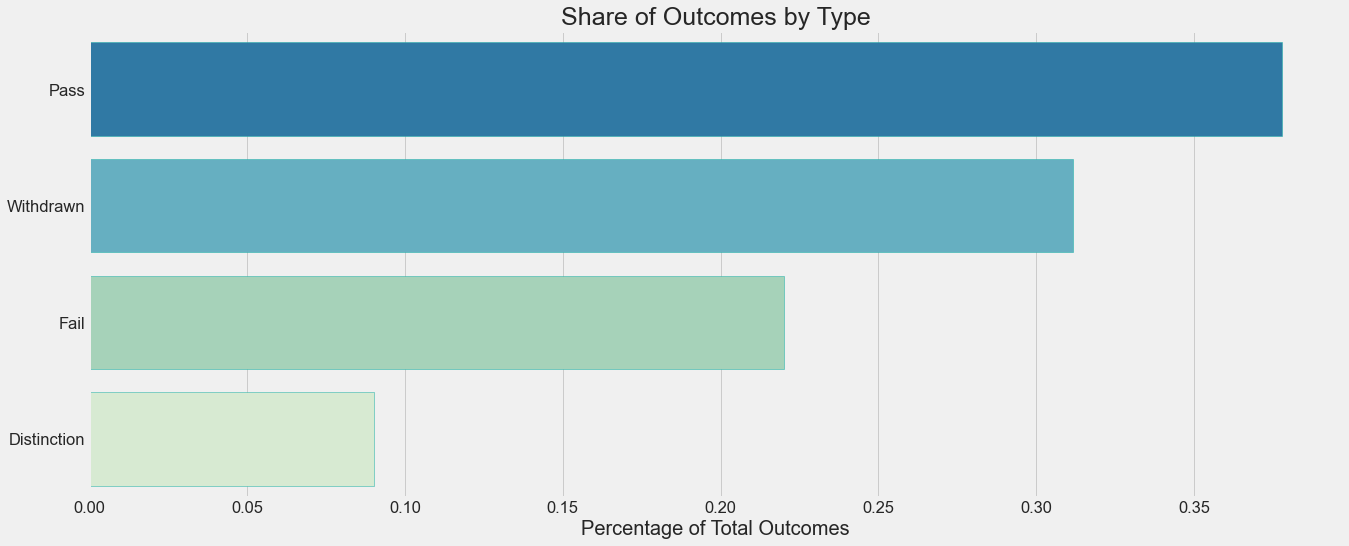

,Outcome,Percentage
0,Pass,0.377922
1,Withdrawn,0.311521
2,Fail,0.220203
3,Distinction,0.090354


time: 136 ms


In [11]:
v.outcomes_type(student_info)

## IMD Band Analysis

## Percentage of Each Outcome by IMD Band

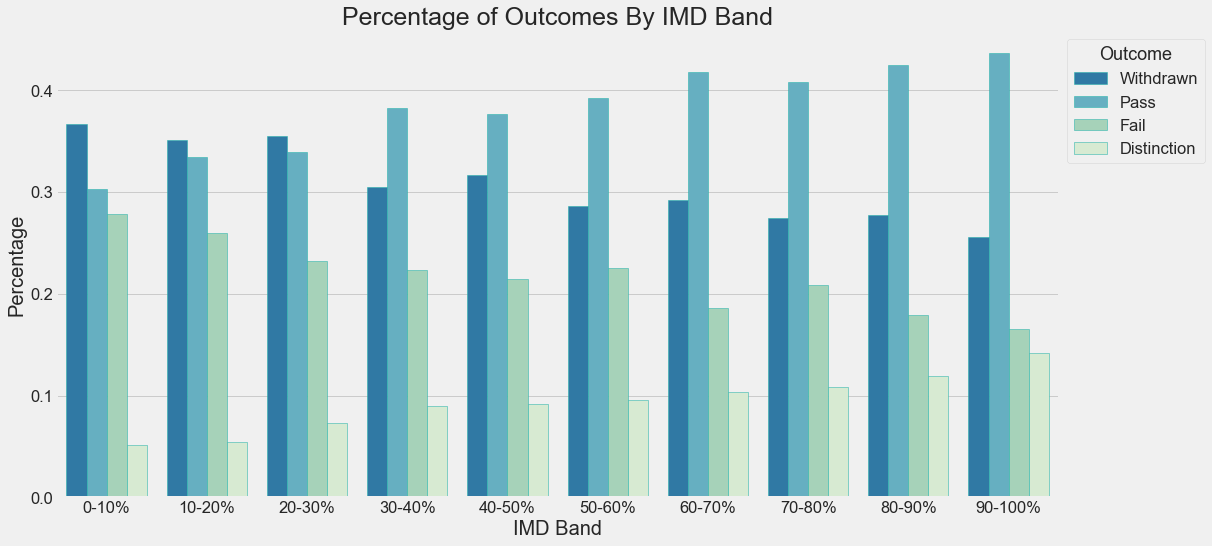

time: 265 ms


In [12]:
v.outcomes_imd(student_info)

## Investigating IMD Band Contingency Tabels

In [13]:
# creating a contingency table
tabs = pd.crosstab(student_info.imd_band, student_info.final_result)

time: 20.6 ms


In [14]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 638 µs


In [15]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
imd_band,,,,
0-10%,168,911,989,1199
10-20%,189,904,1163,1219
20-30%,263,838,1222,1279
30-40%,313,780,1337,1067
40-50%,293,689,1211,1018
50-60%,296,699,1217,887
60-70%,299,535,1204,842
70-80%,312,597,1169,788
80-90%,326,489,1162,760


time: 5.43 ms


In [16]:
# values from the best fitting independent distribution
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
imd_band,,,,
0-10%,295.188094,719.402967,1234.670884,1017.738055
10-20%,313.981826,765.205176,1313.278641,1082.534357
20-30%,325.456846,793.170948,1361.274724,1122.097483
30-40%,315.969625,770.049640,1321.592923,1089.387811
40-50%,290.128243,707.071603,1213.507257,1000.292898
50-60%,280.008541,682.408875,1171.180003,965.402582
60-70%,260.220909,634.184434,1088.415104,897.179553
70-80%,258.955947,631.101593,1083.124197,892.818264
80-90%,247.300218,602.695415,1034.372271,852.632096


time: 6.52 ms


From the contingency tables it appears that, in general, Distinction and Pass vary directly with IMD band. The higher the student's IMD band, the more likely the student is to pass or pass with distinction. Conversely, Withdrawn and Fail vary inversely with IMD band. In general, the lower the student's IMD band the more likely the student is to fail or withdraw.

From the contingency tables it appears that, in general, Distinction and Pass vary directly with IMD band. The higher the student's IMD band, the more likely the student is to pass or pass with distinction. Conversely, Withdrawn and Fail vary inversely with IMD band. In general, the lower the student's IMD band the more likely the student is to fail or withdraw.

## Chi-Square Test for `imd_band`
Ho = `imd_band` and `final_result` are independent.

Ha = `imd_band` and `final_result` are not independent.

alpha = .05

In [17]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 653.0806826983792
p value= 2.473461324525511e-120
degrees of freedom = 27
time: 1.7 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `imd_band` and `final_result` are not independent.

In [18]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

V = 0.08360564396104112
Cramer's V Degrees of Freedom = 3

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

time: 4.21 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `imd_band` has a small, statistically significant effect on `final_result`.

## Disability Status Analysis

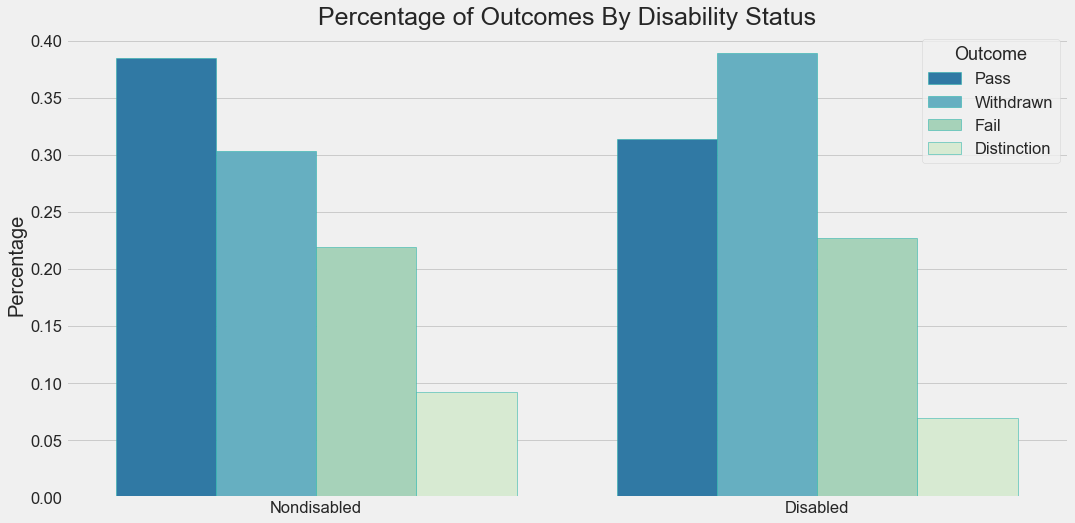

,Disability,Outcome,Percentage
0,No,Pass,0.384920
1,No,Withdrawn,0.303035
2,No,Fail,0.219404
3,No,Distinction,0.092641
4,Yes,Withdrawn,0.389179
5,Yes,Pass,0.313885
6,Yes,Fail,0.227510
7,Yes,Distinction,0.069426


time: 152 ms


In [19]:
v.outcomes_dis(student_info)

## Investigating `Disability` Contingency Tabels

In [20]:
# creating a contingency table
tabs = pd.crosstab(student_info.disability, student_info.final_result)

time: 15.8 ms


In [21]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 739 µs


In [22]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
No,2601,6160,10807,8508
Yes,213,698,963,1194


time: 5.1 ms


In [23]:
# values from the best fitting independent distribution
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
No,2536.792448,6182.417416,10610.535577,8746.254559
Yes,277.207552,675.582584,1159.464423,955.745441


time: 6.15 ms


In [24]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson

final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
No,1.274805,-0.285106,1.907284,-2.547594
Yes,-3.856413,0.862475,-5.769726,7.706729


time: 5.63 ms


From the contingency tables it appears that a disability status contributes negatively to Distinction, Pass, while it contributes positively to Withdrawn and Fail. Conversely,  nondisability status contributes positively to Distinction and Pass,  while it contributes negatively to Fail  and Withdrawn.

## Chi-Square Test for `disability`
Ho = `disability` and `final_result` are independent.

Ha = `disability` and `final_result` are not independent.

alpha = .05

In [25]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 120.13357979289296
p value= 7.222172836526508e-26
degrees of freedom = 3
time: 1.91 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `disability` and `final_result` are not independent.

In [26]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

V = 0.062107638130353235
Cramer's V Degrees of Freedom = 1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

time: 4.73 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `disability` no statistically significant effect on `final_result`.

## Age Band Analysis

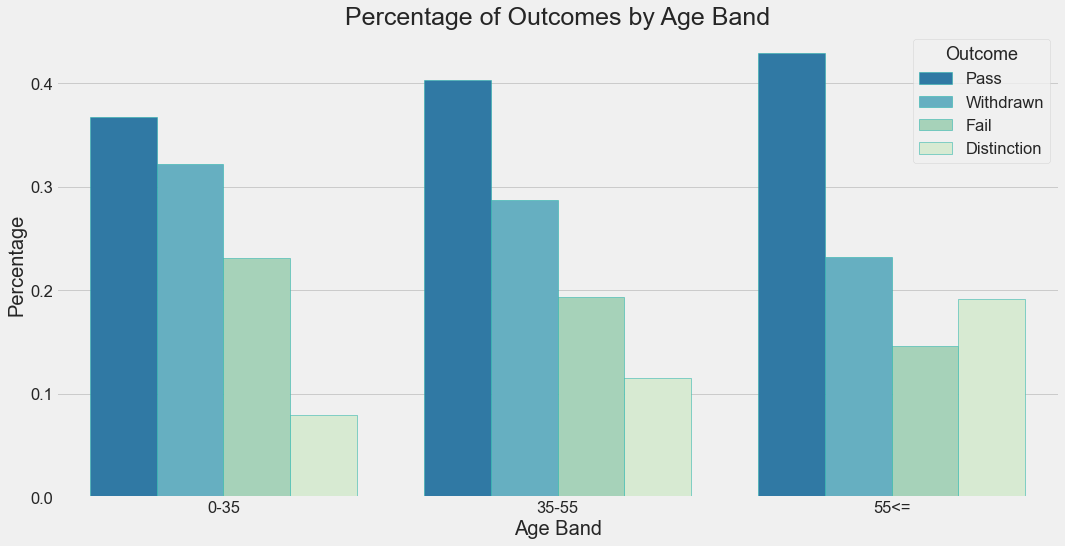

time: 155 ms


In [27]:
v.outcomes_age(student_info)

## Investigating `age_band` Contingency Tabels

In [28]:
# creating a contingency table
tabs = pd.crosstab(student_info.age_band, student_info.final_result)

time: 19.1 ms


In [29]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 623 µs


In [30]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
age_band,,,,
0-35,1745,5097,8084,7088
35-55,1031,1732,3601,2568
55<=,38,29,85,46


time: 4.77 ms


In [31]:
# values from the best fitting independent distribution
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
age_band,,,,
0-35,1989.063576,4847.547264,8319.572951,6857.816209
35-55,807.046237,1966.852556,3375.598510,2782.502697
55<=,17.890188,43.600180,74.828538,61.681094


time: 6.8 ms


In [32]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson

final_result,Distinction,Fail,Pass,Withdrawn
age_band,,,,
0-35,-5.472410,3.582839,-2.582706,2.779597
35-55,7.883320,-5.295529,3.879550,-4.066446
55<=,4.754453,-2.211129,1.175844,-1.996643


time: 6.23 ms


From the contingency tables it appears that the higher age bands contribute positively to Distinction, Pass, while they contribute negatively to Withdrawn and Fail. Conversely, the lower age band contributes negatively to Distinction and Pass,  while it contributes positively to Fail and Withdrawn.

## Chi-Square Test for `age_band`
Ho = `age_band` and `final_result` are independent.

Ha = `age_band` and `final_result` are not independent.

alpha = .05

In [33]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 211.8198957439639
p value= 5.766845225565534e-43
degrees of freedom = 6
time: 1.45 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `age_band` and `final_result` are not independent.

In [34]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

V = 0.05831512109273239
Cramer's V Degrees of Freedom = 2

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

time: 4.25 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `age_band` no statistically significant effect on `final_result`.

## Number of Previous Attemps Analysis

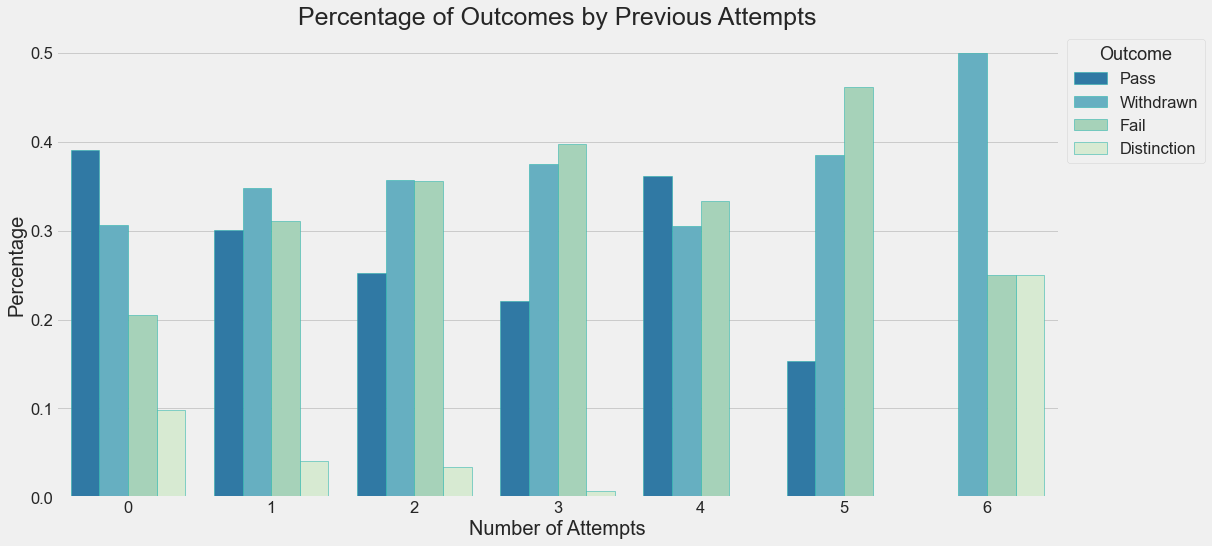

time: 278 ms


In [35]:
v.outcomes_att(student_info)

## Investigating `num_of_prev_attemps` Contingency Tabels

In [36]:
# creating a contingency table
tabs = pd.crosstab(student_info.num_of_prev_attempts, student_info.final_result)

time: 18.6 ms


In [37]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 891 µs


In [38]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
num_of_prev_attempts,,,,
0,2662,5590,10627,8320
1,128,967,936,1084
2,22,228,162,229
3,1,54,30,51
4,0,12,13,11
5,0,6,2,5
6,1,1,0,2


time: 5.09 ms


In [39]:
# values from the best fitting independent distribution
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
num_of_prev_attempts,,,,
0,2458.306497,5989.010997,10279.039653,8472.642854
1,281.540672,685.899087,1177.220064,970.340178
2,57.935015,141.143279,242.246569,199.675138
3,12.291984,29.946156,51.397088,42.364772
4,3.298952,8.037020,13.794071,11.369957
5,1.220160,2.972596,5.101917,4.205327
6,0.406720,0.990865,1.700639,1.401776


time: 7.03 ms


In [40]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson

final_result,Distinction,Fail,Pass,Withdrawn
num_of_prev_attempts,,,,
0,4.108272,-5.155934,3.432049,-1.658315
1,-9.150669,10.733272,-7.030474,3.648757
2,-4.721144,7.310942,-5.155819,2.075267
3,-3.220767,4.395557,-2.984595,1.326696
4,-1.541017,1.397894,-0.213803,-0.109717
5,-0.651960,1.755910,-1.373294,0.387515
6,0.930276,0.009177,-0.920675,0.505272


time: 6.07 ms


From the contingency tables it appears that one previous attempt has the largest contribution to the outcomes. It contributes negatively to Distinction an Pass, while it contributes positively to Withdrawn and Fail. 

## Chi-Square Test for `num_of_prev_attempts`
Ho = `num_of_prev_attempts` and `final_result` are independent.

Ha = `num_of_prev_attempts` and `final_result` are not independent.

alpha = .05

In [41]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 481.74325850959326
p value= 7.147444842814487e-91
degrees of freedom = 18
time: 1.34 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `num_of_prev_attempts` and `final_result` are not independent.

In [42]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

V = 0.07180587855478957
Cramer's V Degrees of Freedom = 3

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

time: 5.5 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `num_of_prev_attemps` has a small, statistically significant effect on `final_result`.

## Education Level Analysis

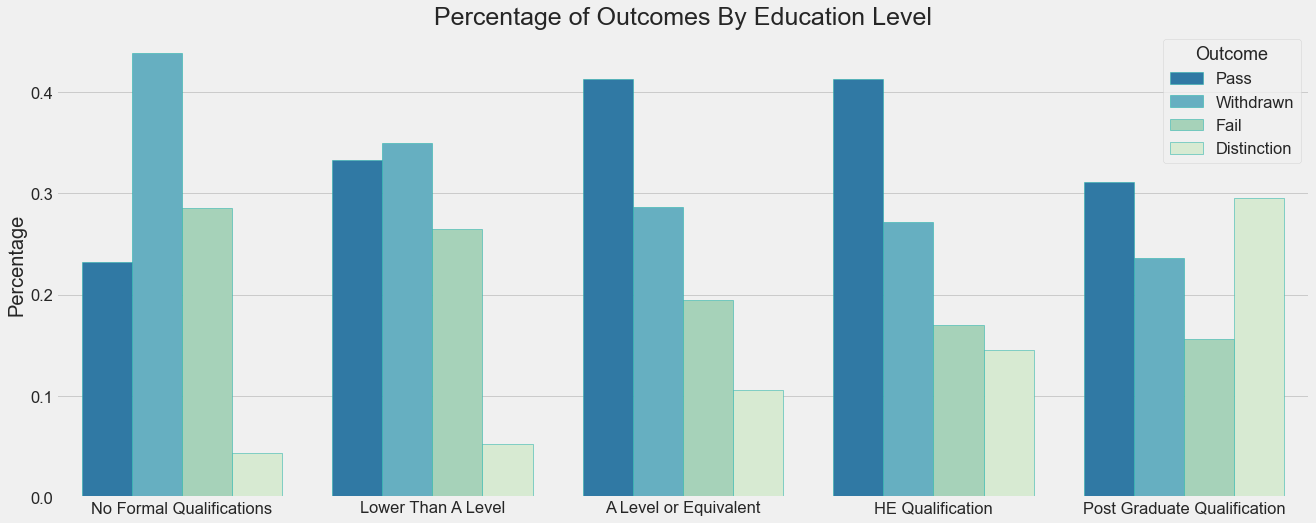

time: 191 ms


In [43]:
v.outcomes_edu(student_info)

## Investigating `highest_education` Contingency Tabels

In [44]:
# creating a contingency table
tabs = pd.crosstab(student_info.highest_education, student_info.final_result)
# sort education levels from lowest to highest
order =  ['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent',
          'HE Qualification', 'Post Graduate Qualification']
tabs.reindex(order)

final_result,Distinction,Fail,Pass,Withdrawn
highest_education,,,,
No Formal quals,14,91,74,140
Lower Than A Level,667,3338,4199,4416
A Level or Equivalent,1437,2652,5622,3906
HE Qualification,641,748,1817,1196
Post Graduate Qualification,55,29,58,44


time: 22.3 ms


In [45]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 826 µs


In [46]:
# the original contingency table
table.table_orig.reindex(order)

final_result,Distinction,Fail,Pass,Withdrawn
highest_education,,,,
No Formal quals,14,91,74,140
Lower Than A Level,667,3338,4199,4416
A Level or Equivalent,1437,2652,5622,3906
HE Qualification,641,748,1817,1196
Post Graduate Qualification,55,29,58,44


time: 5.73 ms


In [47]:
# values from the best fitting independent distribution
table.fittedvalues.reindex(order)

final_result,Distinction,Fail,Pass,Withdrawn
highest_education,,,,
No Formal quals,28.823080,70.244734,120.557090,99.375096
Lower Than A Level,1140.273568,2778.960956,4769.374518,3931.390958
A Level or Equivalent,1230.356987,2998.503275,5146.162664,4241.977074
HE Qualification,397.740432,969.333291,1663.612253,1371.314025
Post Graduate Qualification,16.805934,40.957745,70.293475,57.942846


time: 6.48 ms


In [48]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson.reindex(order)

final_result,Distinction,Fail,Pass,Withdrawn
highest_education,,,,
No Formal quals,-2.761012,2.476404,-4.240230,4.075243
Lower Than A Level,-14.015472,10.604762,-8.259037,7.728913
A Level or Equivalent,5.891219,-6.327834,6.633103,-5.158524
HE Qualification,12.197479,-7.109027,3.760665,-4.734217
Post Graduate Qualification,9.316753,-1.868449,-1.466281,-1.831688


time: 6.79 ms


From the contingency tables it appears that, in general, Distinction and Pass vary directly with education level. The higher the student's education level, the more likely the student is to pass or pass with distinction. Conversely, Withdrawn and Fail vary inversely with education level. In general, the lower the student's education level the more likely the student is to fail or withdraw. 

## Chi-Square Test for `highest_education`
Ho = `highest_education` and `final_result` are independent.

Ha = `highest_education` and `final_result` are not independent.

alpha = .05

In [49]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 962.2117100356752
p value= 2.4827414817328365e-198
degrees of freedom = 12
time: 1.28 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `highest_education` and `final_result` are not independent.

In [50]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

V = 0.10148164448653103
Cramer's V Degrees of Freedom = 3

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

time: 5.25 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `highest_education ` has a small, statistically significant effect on `final_result`.

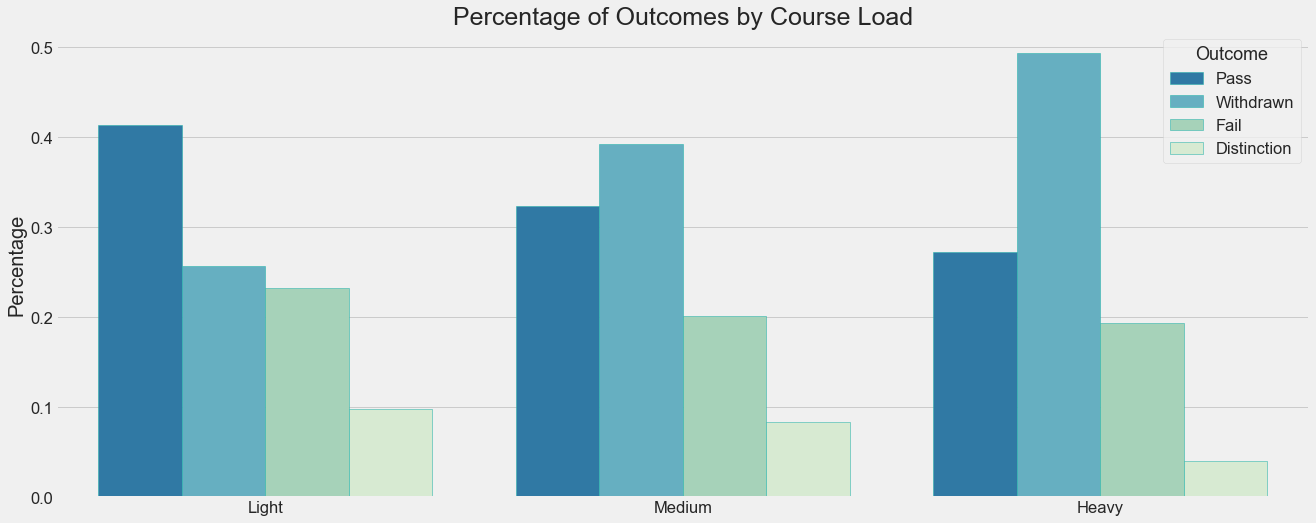

time: 188 ms


In [51]:
v.outcome_cl(student_info)

## Course Load Analysis

In [52]:
# creating a contingency table
tabs = pd.crosstab(student_info.course_load, student_info.final_result)

time: 18.4 ms


In [53]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 800 µs


In [54]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
course_load,,,,
Light,1956,4606,8214,5092
Medium,784,1894,3053,3699
Heavy,74,358,503,911


time: 5.02 ms


In [55]:
# values from the best fitting independent distribution
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
course_load,,,,
Light,1795.162856,4374.991780,7508.552530,6189.292833
Medium,852.042769,2076.513614,3563.803622,2937.639995
Heavy,166.794375,406.494606,697.643848,575.067172


time: 6.95 ms


In [56]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson

final_result,Distinction,Fail,Pass,Withdrawn
course_load,,,,
Light,3.796072,3.492519,8.141165,-13.947682
Medium,-2.331048,-4.005234,-8.556518,14.047233
Heavy,-7.185069,-2.405282,-7.369259,14.008549


time: 8.24 ms


From the contingency tables it appears that a light course load contributes positively to Distinction, Pass, and (counterintuitively) Fail, while it contributes negatively to Withdrawn. Conversely,  Medium and Heavy course loads contribute negatively to Distinction, Pass and (again, counterintuitively) Fail,  while they contribute positively to Withdrawn.

## Chi-Square Test for `course_load`
Ho = `course_load` and `final_result` are independent.

Ha = `course_load` and `final_result` are not independent.

alpha = .05

In [57]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 887.3947035023172
p value= 1.9942967713148247e-188
degrees of freedom = 6
time: 1.41 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `course_load` and `final_result` are not independent.

In [58]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

V = 0.119359288949109
Cramer's V Degrees of Freedom = 2

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

time: 4.83 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `course_load` has a small, statistically significant effect on `final_result`.

## Exploring VLE & Assessment Data

In [59]:
# creating dataframe
assessment_vle = cl.data_prep_full()

time: 16.1 s


In [60]:
drops = ['row_id', 'studied_credits',
         'id_site', 'sum_click', 'date_sub', 'date',
         'course_length', 'max_date']

time: 602 µs


In [61]:
assessment_vle = cl.pipe_cleaner_wa(assessment_vle, drops).reset_index(drop=True)

time: 85.5 ms


In [62]:
assessment_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21642 entries, 0 to 21641
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                21642 non-null  int64   
 1   gender                21642 non-null  object  
 2   region                21642 non-null  object  
 3   highest_education     21642 non-null  object  
 4   imd_band              21642 non-null  object  
 5   age_band              21642 non-null  object  
 6   num_of_prev_attempts  21642 non-null  int64   
 7   disability            21642 non-null  object  
 8   final_result          21642 non-null  object  
 9   weighted_ave          21642 non-null  float64 
 10  mean_score            21642 non-null  float64 
 11  median_score          21642 non-null  float64 
 12  sum_activity          21642 non-null  int64   
 13  activity_level        21642 non-null  category
 14  course_load           21642 non-null  category
dtypes:

## Activity Level

In [63]:
assessment_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21642 entries, 0 to 21641
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                21642 non-null  int64   
 1   gender                21642 non-null  object  
 2   region                21642 non-null  object  
 3   highest_education     21642 non-null  object  
 4   imd_band              21642 non-null  object  
 5   age_band              21642 non-null  object  
 6   num_of_prev_attempts  21642 non-null  int64   
 7   disability            21642 non-null  object  
 8   final_result          21642 non-null  object  
 9   weighted_ave          21642 non-null  float64 
 10  mean_score            21642 non-null  float64 
 11  median_score          21642 non-null  float64 
 12  sum_activity          21642 non-null  int64   
 13  activity_level        21642 non-null  category
 14  course_load           21642 non-null  category
dtypes:

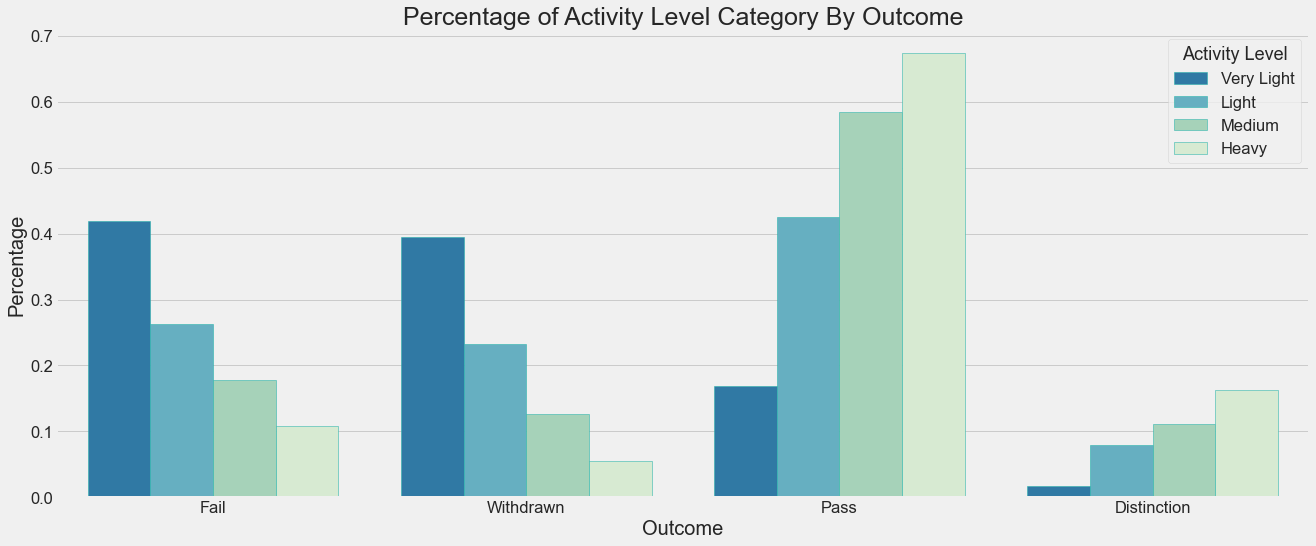

time: 229 ms


In [64]:
v.outcomes_sumact(assessment_vle)

## Activity Level Contingency Table

In [65]:
# creating a contingency table
tabs = pd.crosstab(assessment_vle.activity_level, assessment_vle.final_result)

time: 17.1 ms


In [66]:
# creating a statsmodels table object
table = sm.stats.Table(tabs)

time: 769 µs


In [67]:
# the original contingency table
table.table_orig

final_result,Distinction,Fail,Pass,Withdrawn
activity_level,,,,
Very Light,95,2310,933,2175
Light,433,1436,2327,1273
Medium,598,963,3163,682
Heavy,854,566,3542,292


time: 5.69 ms


In [68]:
# values from the best fitting independent distribution
table.fittedvalues

final_result,Distinction,Fail,Pass,Withdrawn
activity_level,,,,
Very Light,504.377599,1343.733250,2538.445846,1126.443305
Light,500.352093,1333.008733,2518.186166,1117.453008
Medium,494.588301,1317.653174,2489.177987,1104.580538
Heavy,480.682007,1280.604842,2419.190001,1073.523149


time: 6.55 ms


In [69]:
# pearsons residuals: negatives indicate fewer results than expected, positives indicate more.
table.resid_pearson

final_result,Distinction,Fail,Pass,Withdrawn
activity_level,,,,
Very Light,-18.228301,26.359702,-31.864838,31.241886
Light,-3.011017,2.820875,-3.809891,4.653149
Medium,4.649944,-9.770196,13.505704,-12.714837
Heavy,17.027465,-19.969095,22.828180,-23.852623


time: 12 ms


From the contingency tables it appears that a light activity levels contribute negatively to Distinction and  Pass, while it contributes positively to Withdrawn and Fail. Conversely,  Medium and Heavy activity levels contribute positively to Distinction an Pass, while they contribute negatively to Withdrawn and Fail.

## Chi-Square Test for `activity_level`
Ho = `activity_level` and `final_result` are independent.

Ha = `activity_level` and `final_result` are not independent.

alpha = .05

In [70]:
# calculating chi-squared,p-value, degrees of freedom
f.chi_sq_test(tabs)

chi-squared = 5311.641369904437
p value= 0.0
degrees of freedom = 9
time: 1.21 ms


Since the p value is less than our alpha, we reject the null hypothesis and conclude that `activity_level` and `final_result` are not independent.

In [71]:
# calculating cramer's v to measure the effect sizes
f.cramers_v(tabs)

V = 0.2860256944226357
Cramer's V Degrees of Freedom = 3

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

time: 4.47 ms


Adjusted for degrees of freedom, the Cramer's V results indicate that `activity_level` has a large effect on `final_result`.